In [1]:
import pathlib

In [2]:
data = pathlib.Path('C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/Rice_Image_Dataset')

In [3]:
data_dir=list(data.glob('*/*.jpg'))[:5]
data_dir

[WindowsPath('C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/Rice_Image_Dataset/Arborio/Arborio (1).jpg'),
 WindowsPath('C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/Rice_Image_Dataset/Arborio/Arborio (10).jpg'),
 WindowsPath('C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/Rice_Image_Dataset/Arborio/Arborio (2).jpg'),
 WindowsPath('C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/Rice_Image_Dataset/Arborio/Arborio (3).jpg'),
 WindowsPath('C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/Rice_Image_Dataset/Arborio/Arborio (4).jpg')]

In [6]:
rices_names={
    'arborio':list(data.glob('Arborio/*.jpg')),
    'basmati':list(data.glob('Basmati/*.jpg')),
    'ipsala':list(data.glob('Ipsala/*.jpg')),
    'jasmine':list(data.glob('Jasmine/*.jpg')),
    'karacadag':list(data.glob('Karacadag/*.jpg')),
}

In [7]:
rice_labels={
    'arborio':0,
    'basmati':1,
    'ipsala':2,
    'jasmine':3,
    'karacadag':4,
}

In [8]:
import cv2

In [9]:
img1=cv2.imread(str(rices_names['arborio'][0]))
img1

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [10]:
img2=cv2.imread(str(rices_names['ipsala'][0]))
img2,img2.shape

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 (250, 250, 3))

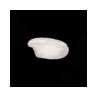

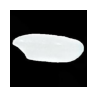

In [11]:
import matplotlib.pyplot as plt
test_list=[img1,img2]
for i in range(0,2):
    plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(test_list[i])

**PART 2:**

In [15]:
X,y=[],[]
for names,path in rices_names.items():
    for image in path:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(32,32))
        X.append(resized_img)
        y.append(rice_labels[names])

In [16]:
import numpy as np
X=np.array(X)
y=np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
len(X_train)

40

In [19]:
len(y_train)

40

In [20]:
y_train.shape

(40,)

In [21]:
X_train=X_train/255
X_test=X_test/255

In [119]:
from tensorflow import keras

2024-06-02 15:58:40.407120: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 15:58:40.407364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 15:58:40.579696: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**PART 3:**

In [120]:
model=keras.Sequential([
    keras.layers.Conv2D(64,kernel_size=(2,2),input_shape=(32, 32, 3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(30,kernel_size=(2,2),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='softmax'),
])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 30)     │         7,710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1470)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        29,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,227 (149.32 KB)

 Trainable params: 38,227 (149.32 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [122]:
history=model.fit(X_train,y_train,epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.8800 - loss: 0.3232 - val_accuracy: 0.9448 - val_loss: 0.1632
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9651 - loss: 0.1028 - val_accuracy: 0.9657 - val_loss: 0.1026
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9698 - loss: 0.0838 - val_accuracy: 0.9753 - val_loss: 0.0736


In [123]:
test_history=model.evaluate(X_test,y_test)

469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9753 - loss: 0.0750


In [131]:
preds=model.predict(X_test)
y_pred = np.argmax(preds, axis=1)

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


**PART 4:**

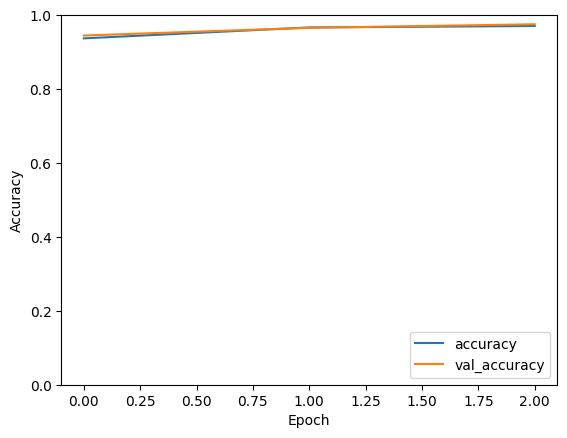

In [132]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## Confusion_matrix

Text(58.222222222222214, 0.5, 'Truth')

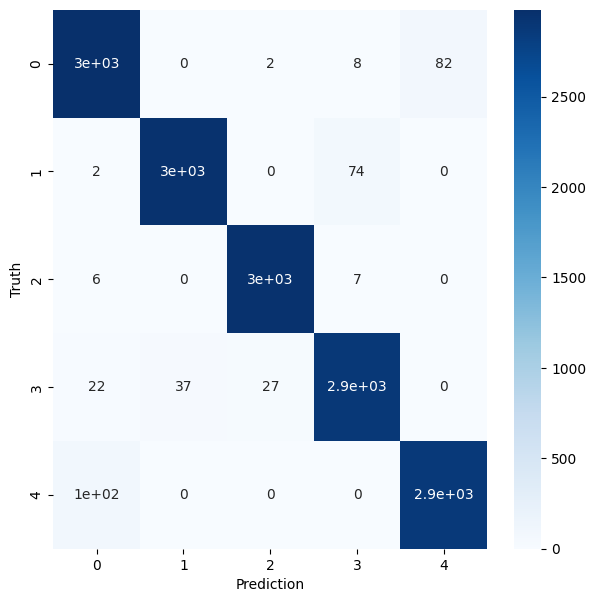

In [136]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=((7,7)))
sn.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Truth')

## Classification_report

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3072
           1       0.99      0.97      0.98      3028
           2       0.99      1.00      0.99      2964
           3       0.97      0.97      0.97      2965
           4       0.97      0.96      0.97      2971

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000



**PART 5:**

In [139]:
model.save('model.h5')